### Data Wrangling

In [299]:
#import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

from numpy import mean
from numpy import std
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
import matplotlib.lines as mlines
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report, recall_score, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score


In [300]:
plt.style.use("ggplot")
plt.rcParams["axes.labelweight"] = "bold"
warnings.simplefilter('ignore')

In [301]:
#Reading the train data set
data = pd.read_csv("train.csv")
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [302]:
data.shape

(617, 58)

In [303]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [305]:
#number of categories present in 'EJ' column along with their count
data["EJ"].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [306]:
#number of categories present in target column 'Class' along with their count
data["Class"].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [307]:
data.columns = data.columns.str.strip()

In [308]:
data['Class']= data['Class'].astype("category")

In [309]:
data.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [310]:
data.isna().sum()[data.isna().sum() > 0].sort_values(ascending = False)

BQ    60
EL    60
CC     3
CB     2
FS     2
DU     1
FC     1
FL     1
GL     1
dtype: int64

In [311]:
!pip install missingno

<Axes: >

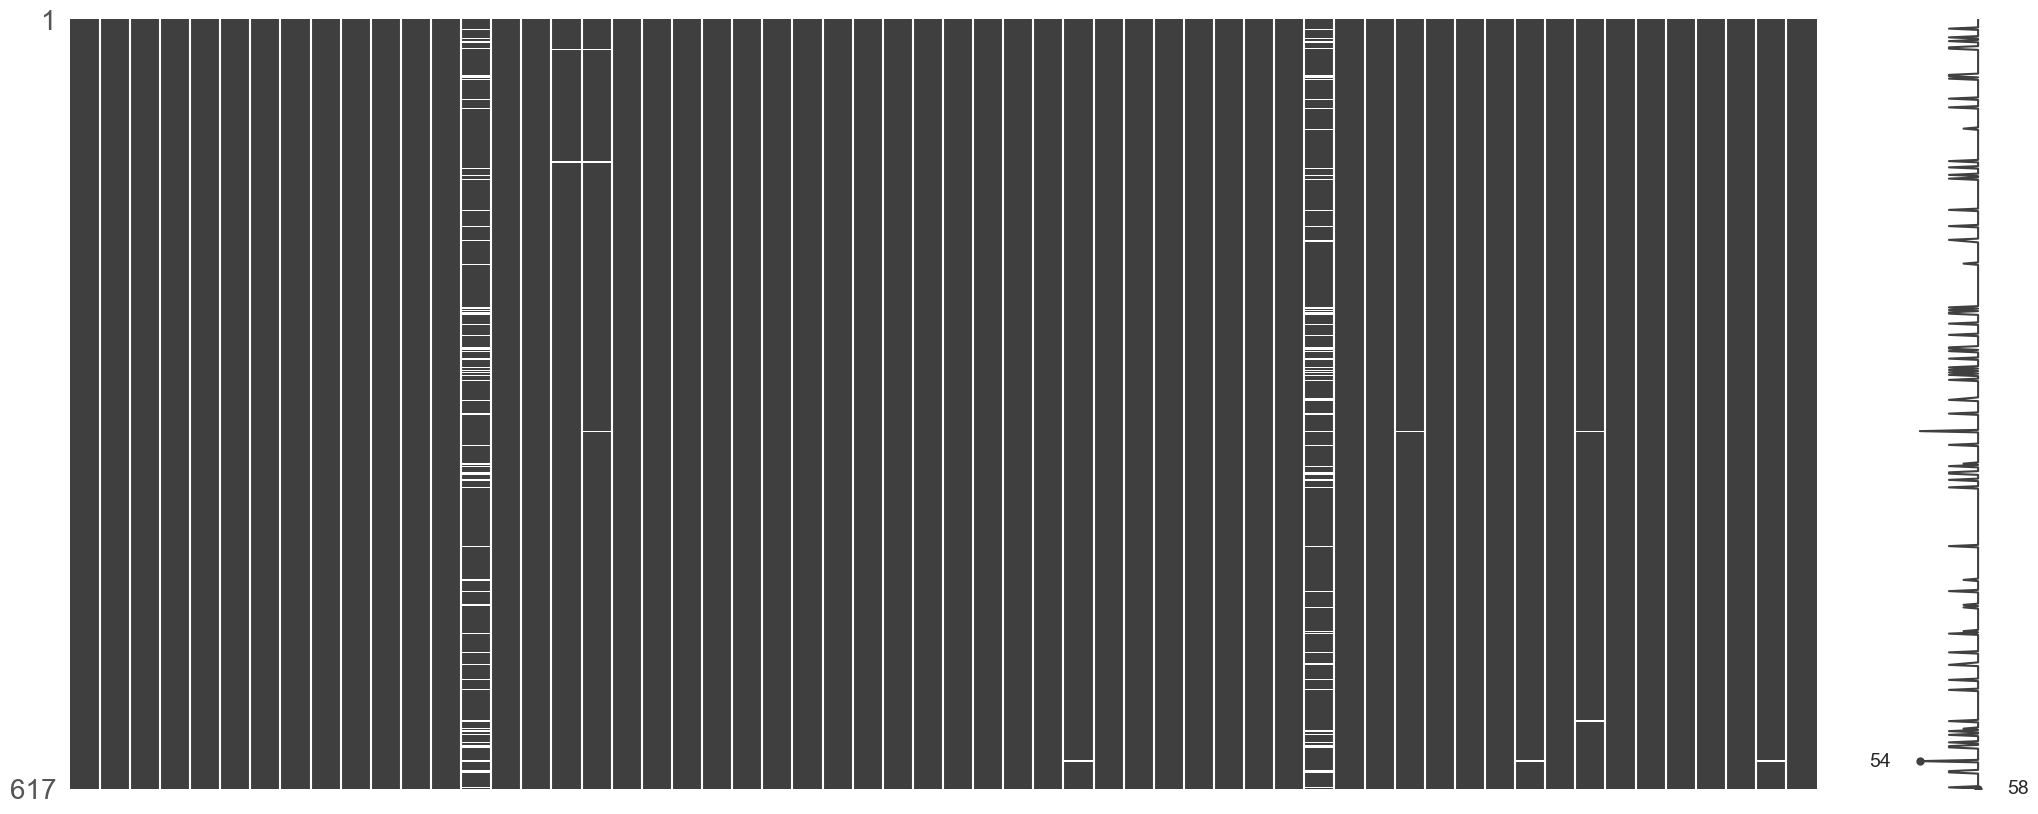

In [312]:
#visualizing the missingness
import missingno as msno
msno.matrix(data)

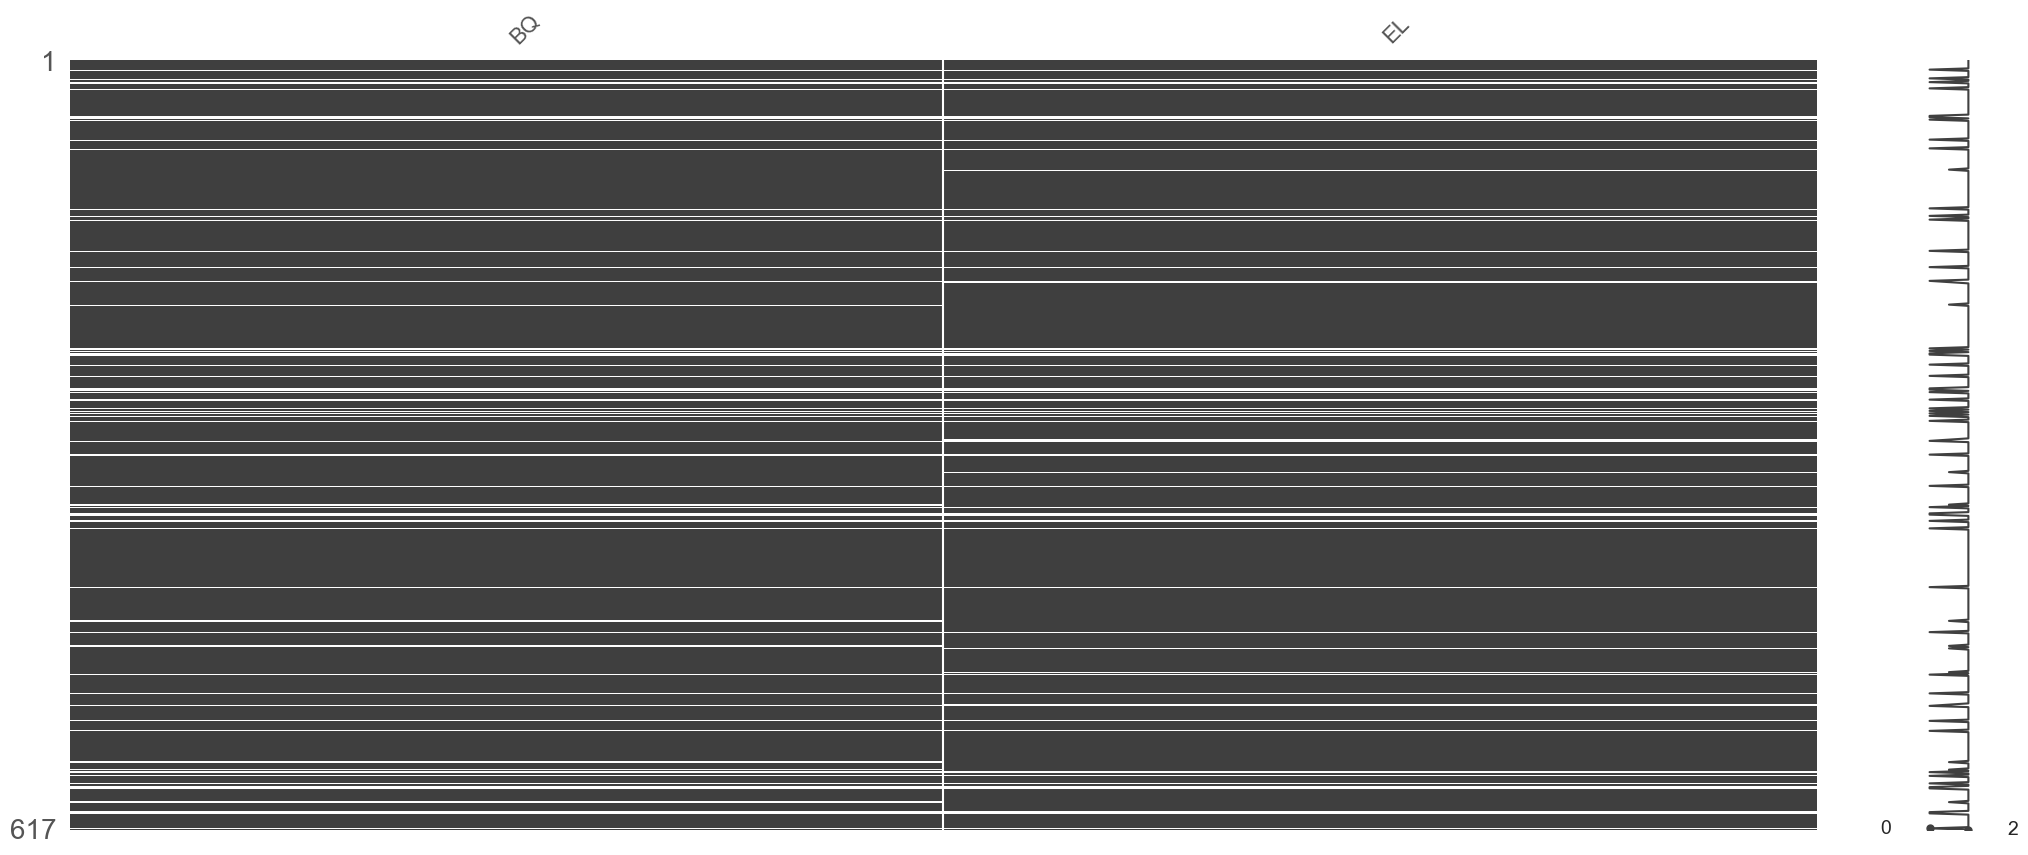

In [313]:
#visualizing missingness
import missingno as msno
msno.matrix(data[['BQ','EL']])
plt.show()

In [314]:
z = data[['BQ','EL']]
sum(z[['BQ']].isna().values == z[['EL']].isna().values)/len(z)

array([0.97730956])

In [315]:
data[['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']].agg(['min','max'])

,BQ,CB,CC,DU,EL,FC,FL,FS,GL
min,1.331155,12.499760,0.176874,0.005518,5.394675,7.534128,0.173229,0.067730,0.001129
max,344.644105,2271.436167,4.103032,161.355315,109.125159,3030.655824,137.932739,31.365763,21.978000


In [316]:
#Replacing all the numeric featues missing values with their median
data['BQ'].fillna(data['BQ'].median(),inplace = True)
data['CB'].fillna(data['CB'].median(),inplace = True)
data['CC'].fillna(data['CC'].median(),inplace = True)
data['DU'].fillna(data['DU'].median(),inplace = True)
data['EL'].fillna(data['EL'].median(),inplace = True)
data['FC'].fillna(data['FC'].median(),inplace = True)
data['FL'].fillna(data['FL'].median(),inplace = True)
data['FS'].fillna(data['FS'].median(),inplace = True)
data['GL'].fillna(data['GL'].median(),inplace = True)

In [317]:
#checking the null value count
data.isna().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [318]:
#reading greeks data set
greeks = pd.read_csv("greeks.csv")
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [319]:
greeks.shape

(617, 6)

In [320]:
greeks.describe()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617
unique,617,4,3,8,4,198
top,000ff2bfdfe9,A,C,M,B,Unknown
freq,1,509,407,445,456,144


In [321]:
greeks.columns

Index(['Id', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon'], dtype='object')

In [322]:
greeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


In [323]:
greeks.isna().sum()

Id         0
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
dtype: int64

In [324]:
greeks["Alpha"].value_counts()

A    509
B     61
G     29
D     18
Name: Alpha, dtype: int64

In [325]:
greeks["Beta"].value_counts()

C    407
B    202
A      8
Name: Beta, dtype: int64

In [326]:
greeks["Gamma"].value_counts()

M    445
N     64
H     53
B     18
A     11
F     10
G      8
E      8
Name: Gamma, dtype: int64

In [327]:
greeks["Delta"].value_counts()

B    456
A     75
C     64
D     22
Name: Delta, dtype: int64

In [328]:
final_data = pd.merge(data,greeks,how = 'left',on = 'Id')
final_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [329]:
final_data.to_csv("data_wrangling.csv")

### EDA

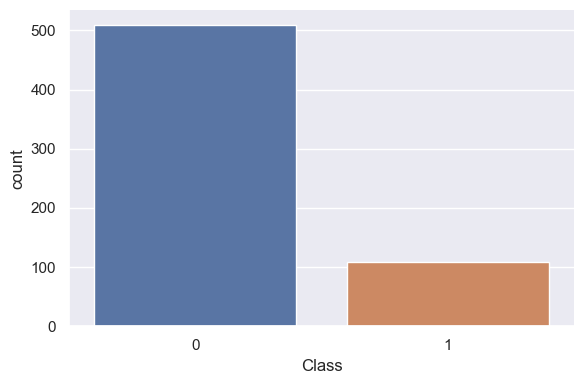

In [298]:
sns.set(style="darkgrid")
sns.catplot(x = 'Class',data = data,kind = 'count',height = 4,aspect = 1.5)

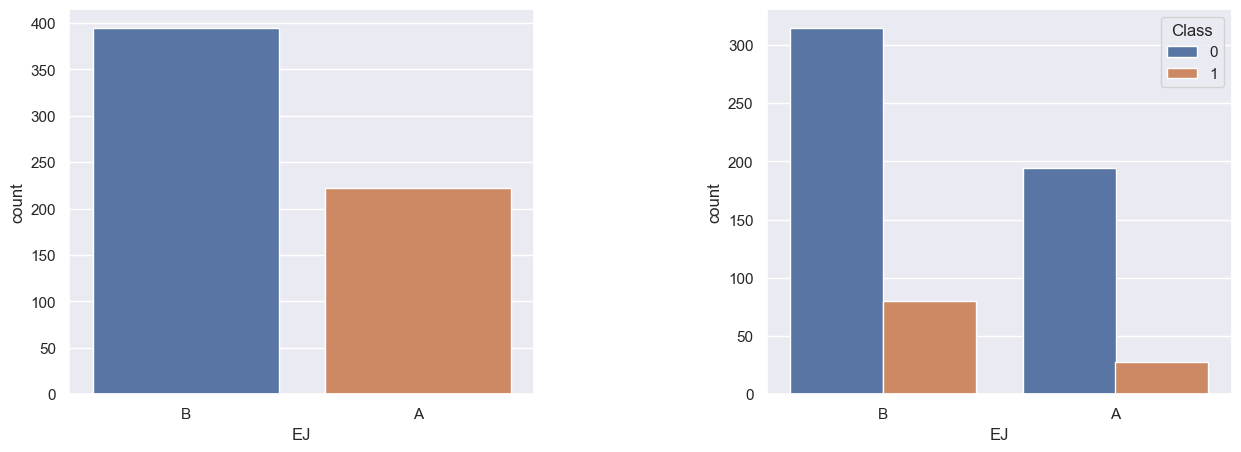

In [250]:
#EJ
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x = 'EJ',data = data,ax= axes[0])
sns.countplot(x = 'EJ',data = data,hue = 'Class',ax=axes[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

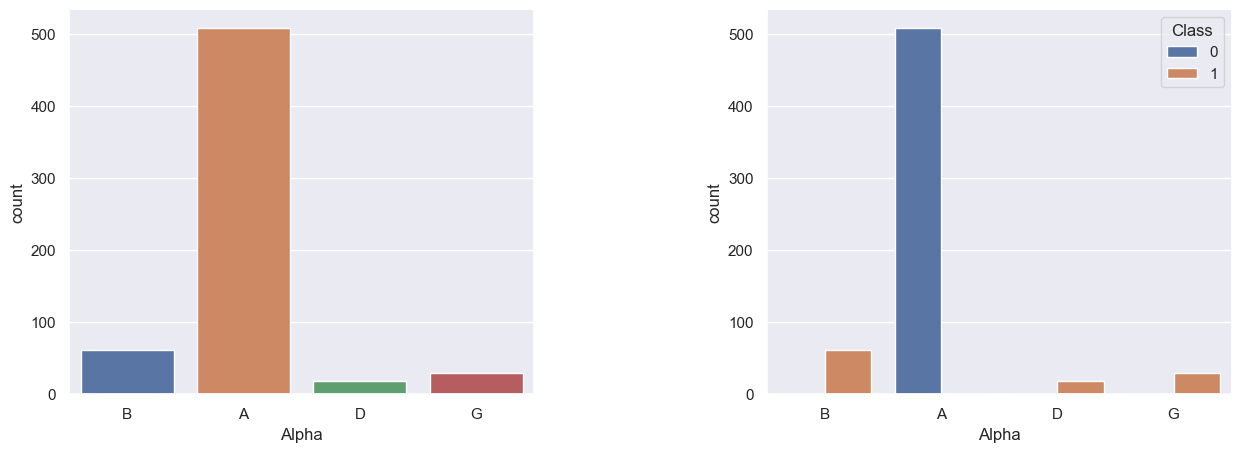

In [251]:
#Alpha
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x = 'Alpha',data = data,ax= axes[0])
sns.countplot(x = 'Alpha',data = data,hue = 'Class',ax=axes[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

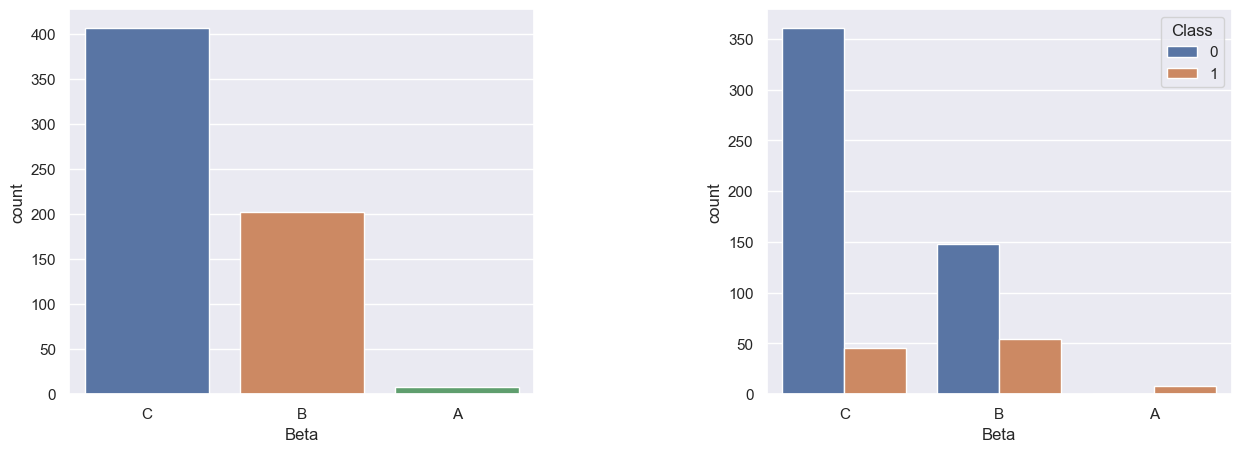

In [252]:
#Beta
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x = 'Beta',data = data,ax= axes[0])
sns.countplot(x = 'Beta',data = data,hue = 'Class',ax=axes[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

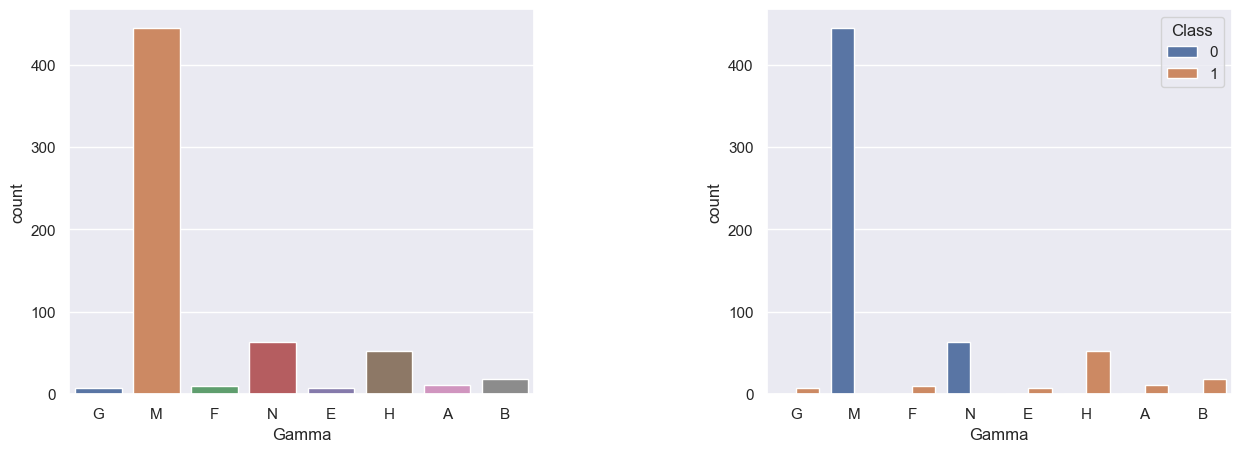

In [253]:
#Gamma
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x = 'Gamma',data = data,ax= axes[0])
sns.countplot(x = 'Gamma',data = data,hue = 'Class',ax=axes[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

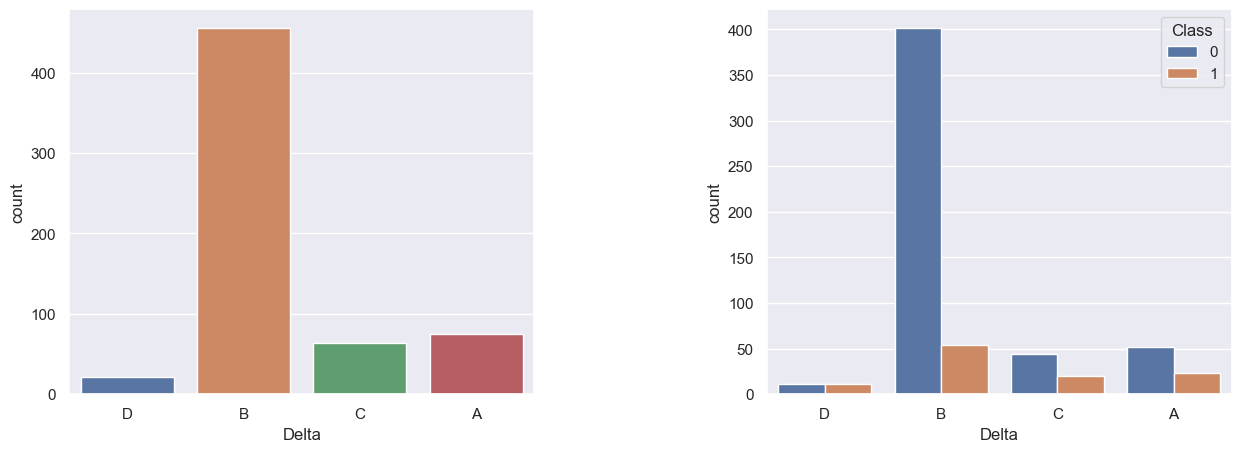

In [254]:
#Delta
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x = 'Delta',data = data,ax= axes[0])
sns.countplot(x = 'Delta',data = data,hue = 'Class',ax=axes[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

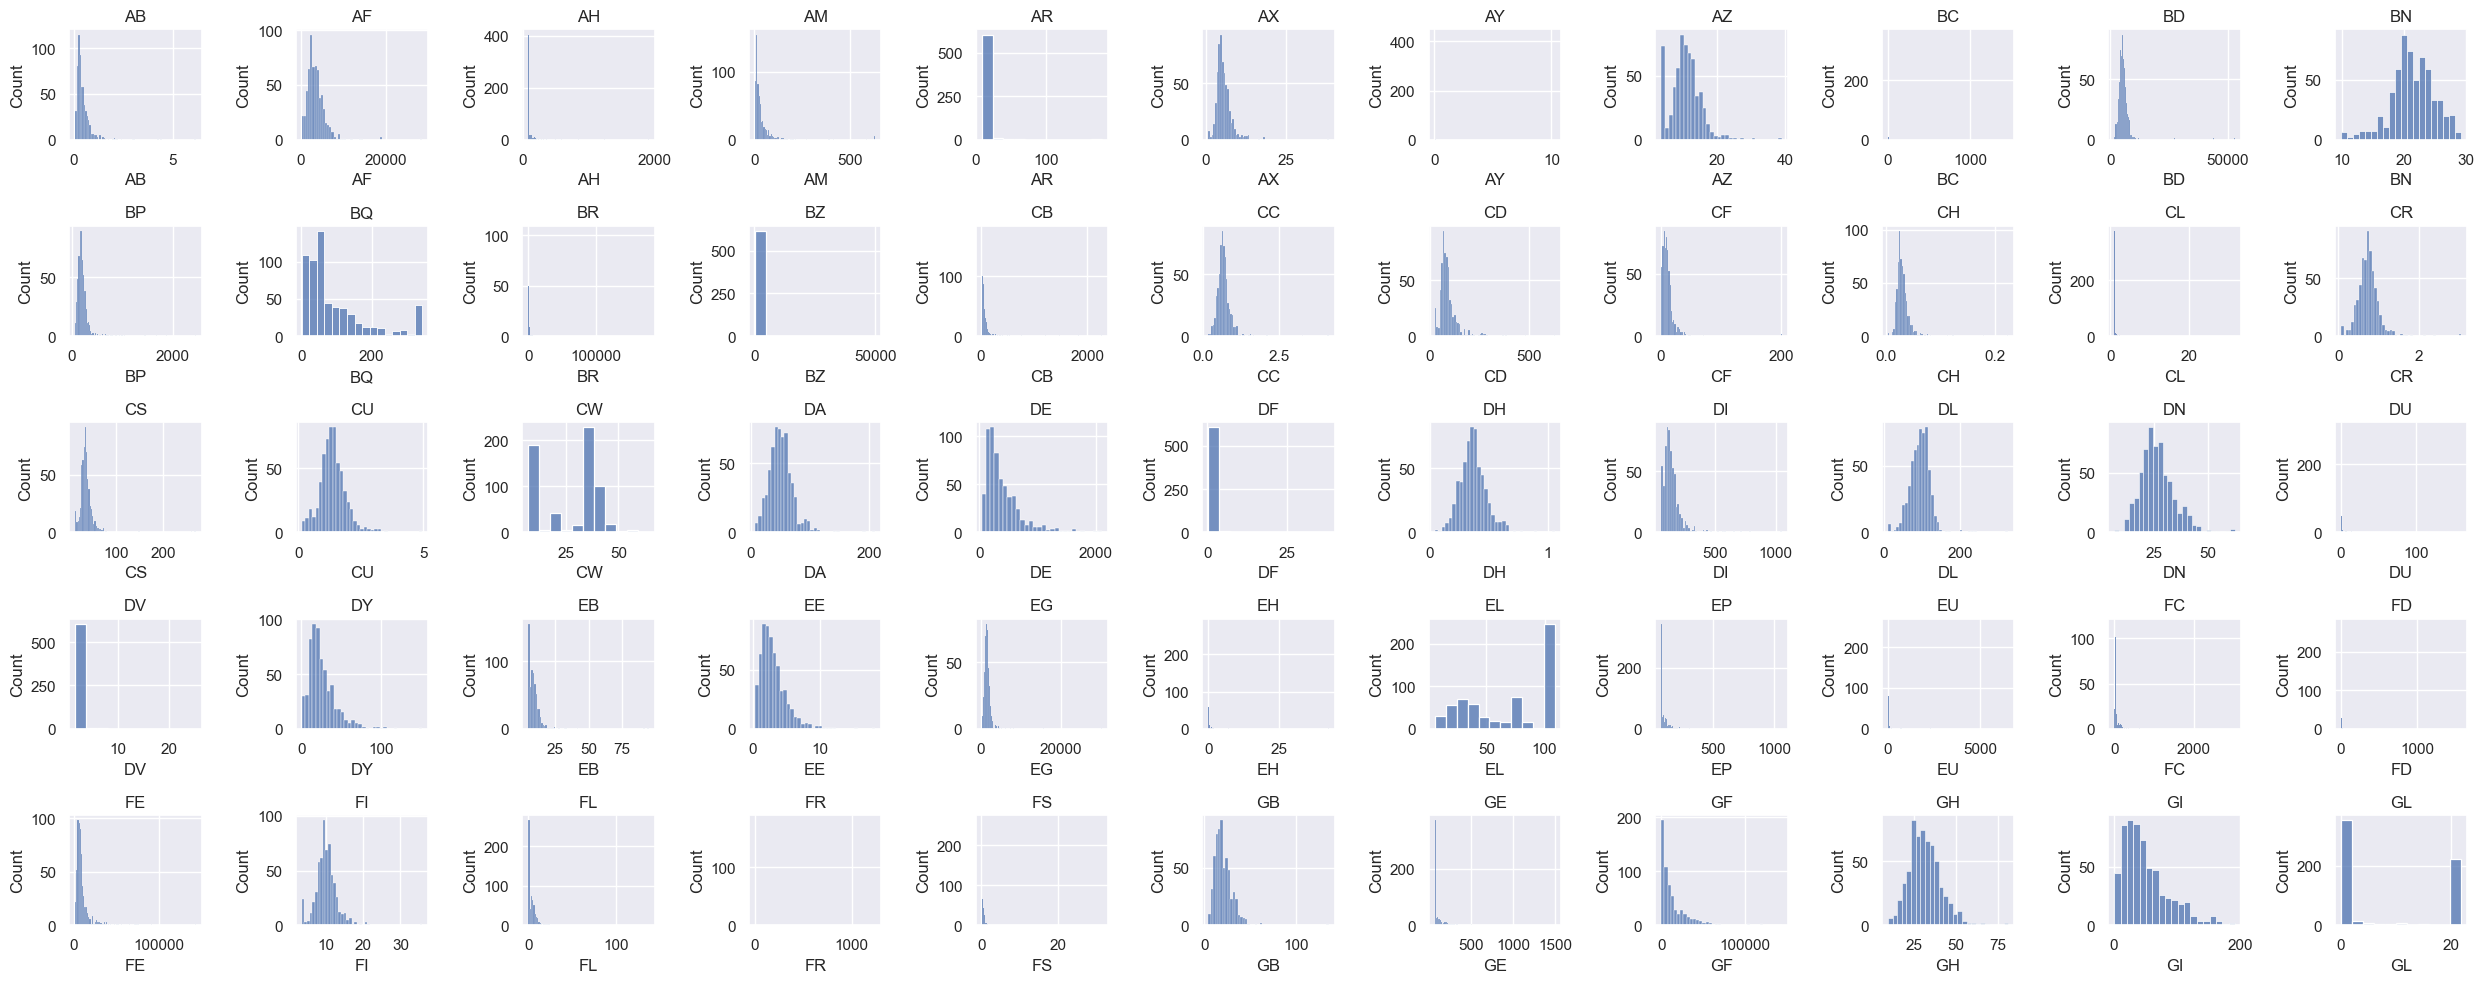

In [255]:
sns.set(style="darkgrid")

# Select only the numerical features from the DataFrame
numerical_features = data.select_dtypes(include='float64')

num_subplots = numerical_features.shape[1]
num_rows = 5
num_cols = 11

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25,10))
axes = axes.flatten()

# Loop through each numerical feature and create the histogram
for i, feature in enumerate(numerical_features.columns):
    ax = axes[i]
    sns.histplot(data[numerical_features.columns[i]], ax=ax)
    ax.set_title(feature)

# Remove empty subplots if necessary
if num_subplots < num_rows * num_cols:
    for j in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


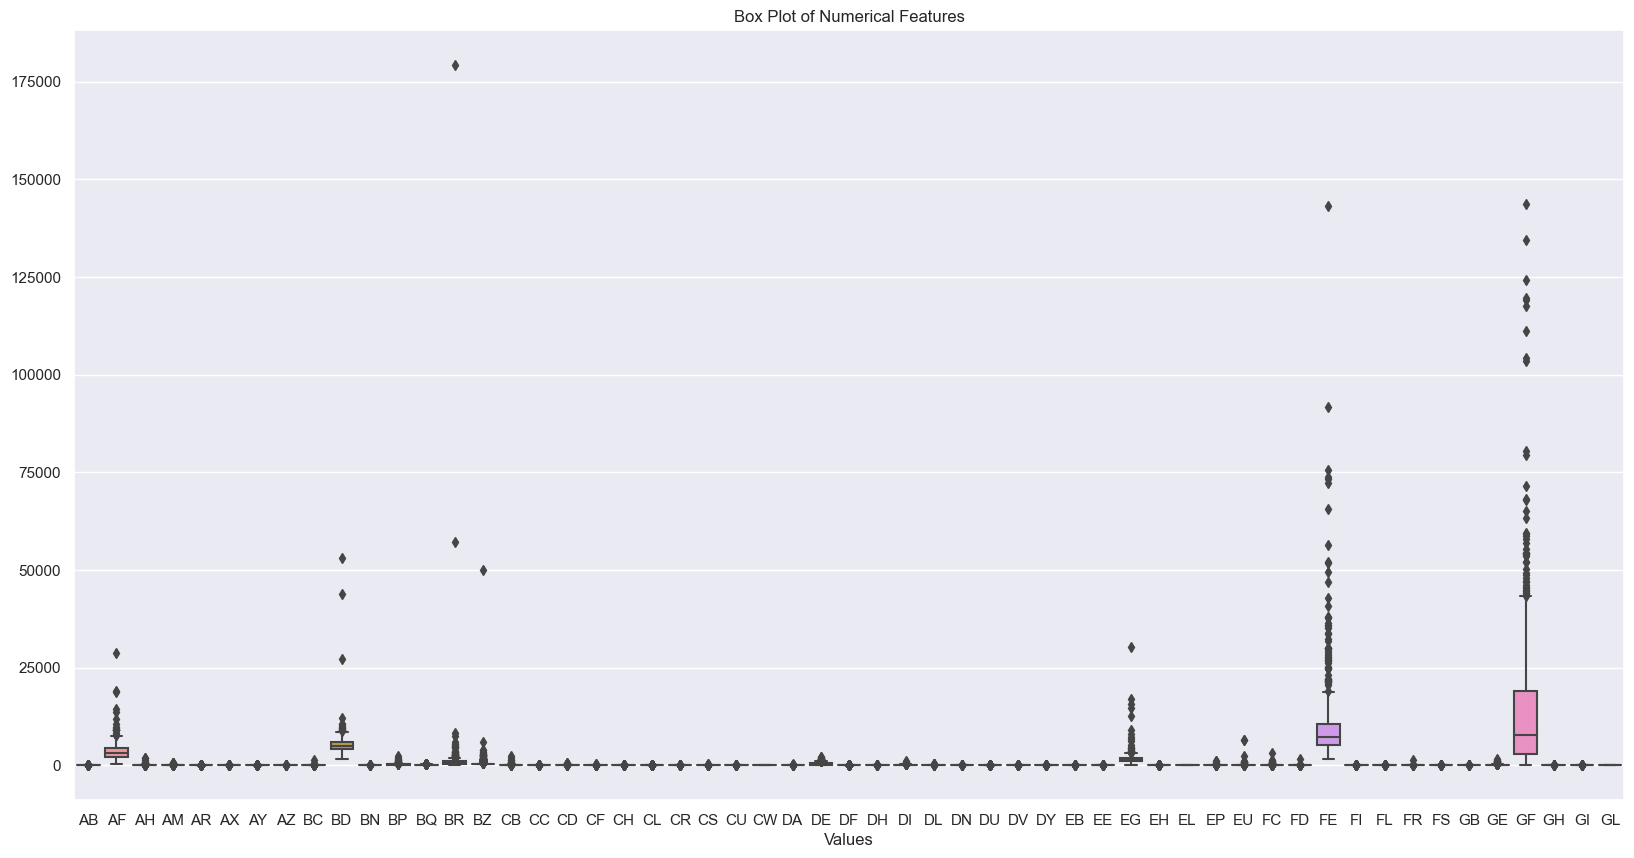

In [256]:
# Select only the numerical features from the DataFrame
numerical_features = data.select_dtypes(include='float64')

# Set the figure size
plt.figure(figsize=(20,10))

# Create the box plot
sns.boxplot(data=numerical_features, orient='v')

# Set the title and labels
plt.title('Box Plot of Numerical Features')
plt.xlabel('Values')

# Show the plot
plt.show()

<Axes: >

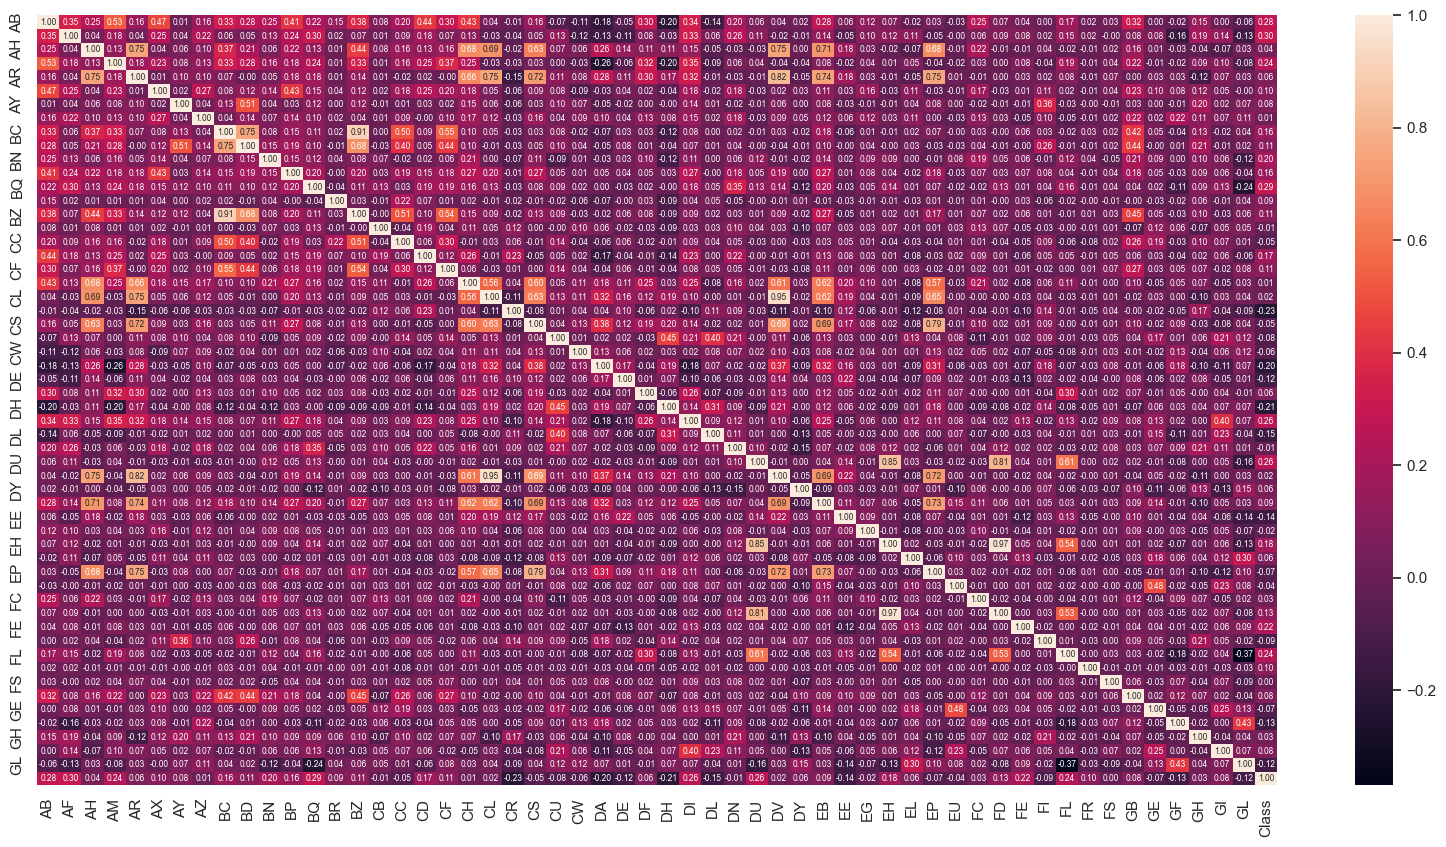

In [257]:
#Heatmap
plt.figure(figsize = (20,10))
numerical_features['Class'] = data['Class'].astype('int')
sns.heatmap(numerical_features.corr(),annot=True, fmt=".2f", annot_kws={"size": 6})

In [258]:
corr_matrix= numerical_features.corr().abs()
# Get the pairs of columns with correlation greater than 0.8
highly_correlated_pairs = []

# Iterate over the columns of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated pairs
print("Pairs of columns with correlation > 0.8:")
for pair in highly_correlated_pairs:
    print(pair)

Pairs of columns with correlation > 0.8:
('AR', 'DV')
('BC', 'BZ')
('CL', 'DV')
('DU', 'EH')
('DU', 'FD')
('EH', 'FD')


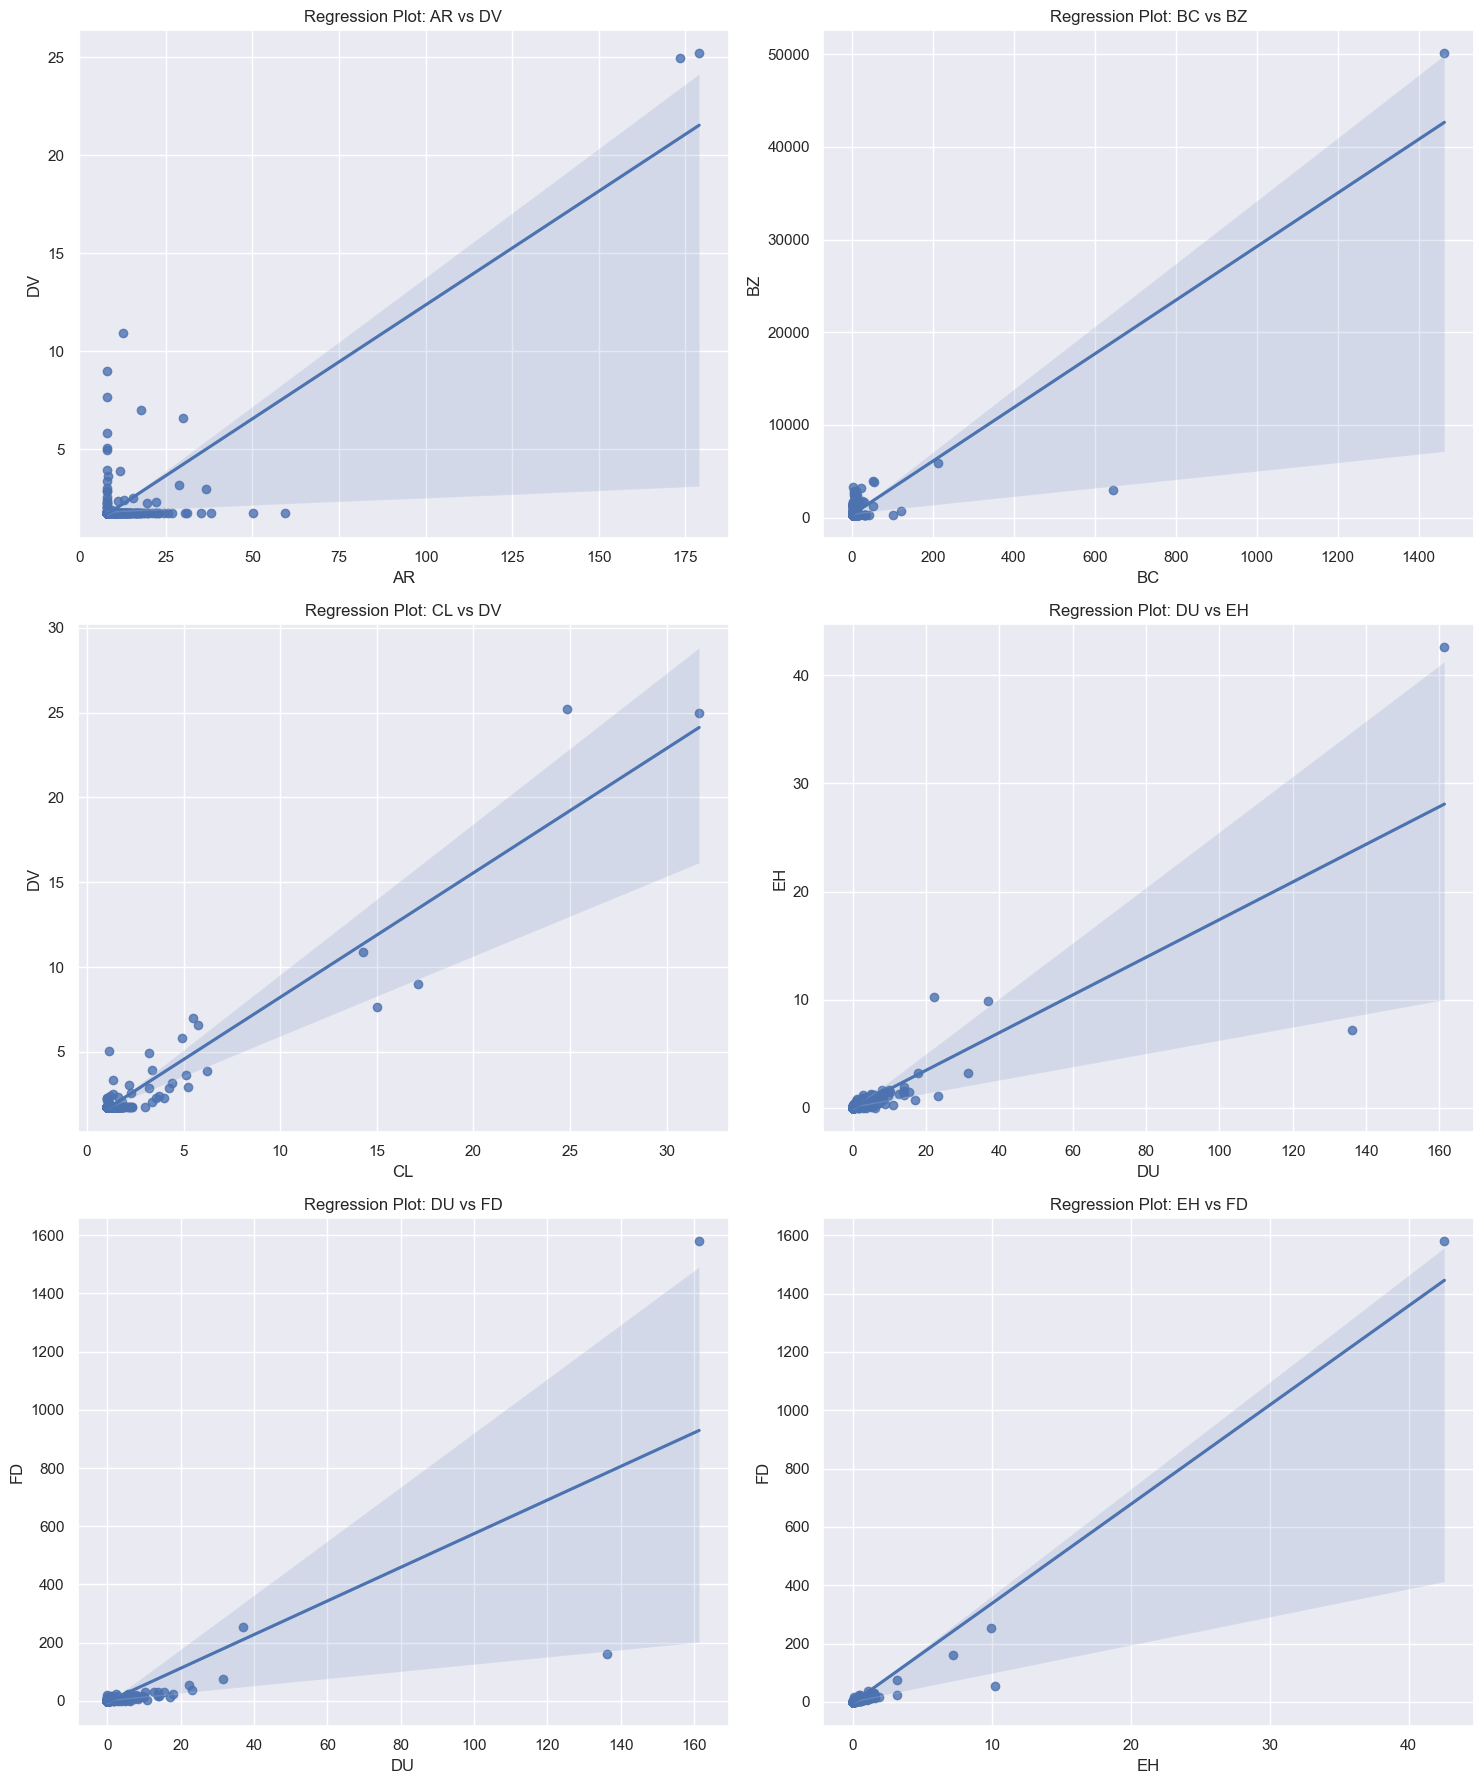

In [259]:
# Determine the number of rows and columns for the subplots grid
num_plots = len(highly_correlated_pairs)
num_cols = 2
num_rows = (num_plots + 1) // 2

# Create subplots with customized figure size and layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Create regplots for each pair of highly correlated columns
for i, pair in enumerate(highly_correlated_pairs):
    column1, column2 = pair
    
    # Select the corresponding axis for the regplot
    ax = axes[i]
    
    # Plot the regplot for the pair of columns
    sns.regplot(data=numerical_features, x=column1, y=column2, ax=ax)
    ax.set_xlabel(column1)
    ax.set_ylabel(column2)
    ax.set_title(f"Regression Plot: {column1} vs {column2}")
    
# Remove any unused subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the regplots
plt.show()

In [260]:
#chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = pd.crosstab(data['Class'],data['EJ'],margins = False) 
#print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[183.14100486 325.85899514]
 [ 38.85899514  69.14100486]]
probability=0.950, critical=3.841, stat=5.229
Dependent (reject H0)
significance=0.050, p=0.022
Dependent (reject H0)


### Preprocessing & Modeling

In [261]:
!pip install xgboost

In [262]:
data.set_index('Id',inplace = True)
data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [263]:
data.drop(['Epsilon'],axis = 1,inplace = True)

In [264]:
dfo = data.select_dtypes(include = 'object')
var_level_cnt = pd.DataFrame(dfo.nunique()).reset_index()
var_level_cnt.columns = ['VarName', 'LevelsCount']
var_level_cnt.sort_values(by='LevelsCount', ascending =False)
var_level_cnt

,VarName,LevelsCount
0,EJ,2
1,Alpha,4
2,Beta,3
3,Gamma,8
4,Delta,4


In [265]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [266]:
data['EJ'] = data['EJ'].map({'A':0,'B':1})
data = data.iloc[:,:-4]

In [267]:
data['EJ'].value_counts()

1    395
0    222
Name: EJ, dtype: int64

In [268]:
data.dtypes

AB        float64
AF        float64
AH        float64
AM        float64
AR        float64
AX        float64
AY        float64
AZ        float64
BC        float64
BD        float64
BN        float64
BP        float64
BQ        float64
BR        float64
BZ        float64
CB        float64
CC        float64
CD        float64
CF        float64
CH        float64
CL        float64
CR        float64
CS        float64
CU        float64
CW        float64
DA        float64
DE        float64
DF        float64
DH        float64
DI        float64
DL        float64
DN        float64
DU        float64
DV        float64
DY        float64
EB        float64
EE        float64
EG        float64
EH        float64
EJ          int64
EL        float64
EP        float64
EU        float64
FC        float64
FD        float64
FE        float64
FI        float64
FL        float64
FR        float64
FS        float64
GB        float64
GE        float64
GF        float64
GH        float64
GI        float64
GL        

In [269]:
data.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [270]:
# Split the data 
from sklearn.model_selection import train_test_split
X = data.drop(['Class'],axis= 1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123,stratify = y)

In [271]:
X_train.shape,y_train.shape

((493, 56), (493,))

In [272]:
X_test.shape,y_test.shape

((124, 56), (124,))

In [273]:
y_train.value_counts()

0    407
1     86
Name: Class, dtype: int64

In [274]:
#Scale the data
from sklearn.preprocessing import StandardScaler
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [275]:
y_train.value_counts()

0    407
1     86
Name: Class, dtype: int64

In [75]:
#!pip install --upgrade imbalanced-learn

In [276]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [277]:
X_train_oversampled.shape,y_train_oversampled.shape

((814, 56), (814,))

In [330]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()
     

In [331]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [332]:
def balanced_log_loss_manual(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    y_true = y_train.astype('int')
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)

Negative balanced log loss might suggest the following:

* The model's predicted probabilities for the majority class (class 0) are highly confident and close to 0.
* The class imbalance is significantly affecting the computation of the balanced log loss.
* The negative value is an artifact of the way the log loss is weighted and balanced across classes.

While a negative balanced log loss might be mathematically possible due to these factors, it's important to interpret it in context. Negative balanced log loss doesn't change the fundamental interpretation of log loss—it's still a measure of prediction quality, with lower values indicating better predictions. 

In [333]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss, confusion_matrix
scoring_metric_manual = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

#define evaluation procedure
def evaluate_model_manual(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scoring_metric_manual, cv=cv, n_jobs=-1)
    
    return scores

In [345]:
data = pd.read_csv("data_wrangling.csv",index_col = 0)
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [346]:
data.set_index('Id',inplace = True)
data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [347]:
data.drop(['Epsilon'],axis = 1,inplace = True)

In [348]:
data['EJ'] = data['EJ'].map({'A':0,'B':1})
data = data.iloc[:,:-4]

In [349]:
data.isna().sum()

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [350]:
# Split the data 
from sklearn.model_selection import train_test_split
X = data.drop(['Class'],axis= 1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123,stratify = y)

In [351]:
#Scale the data
from sklearn.preprocessing import StandardScaler
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [352]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_oversampled,y_train_oversampled = smote.fit_resample(X_train,y_train)

>SVM -0.150 (0.047)
>KNN -1.018 (0.422)
>RF -0.179 (0.012)
>LogReg -0.288 (0.077)
>XGB -0.093 (0.035)


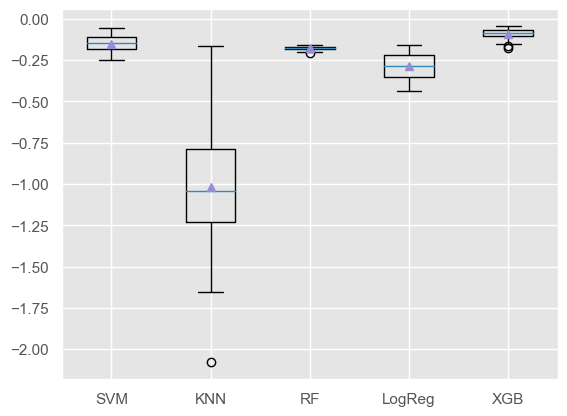

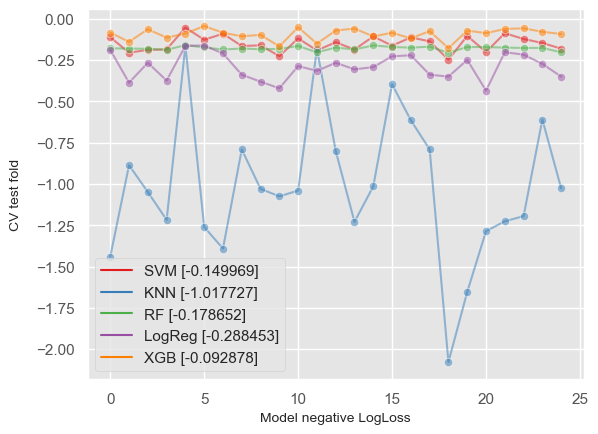

In [355]:
#MANUAL BALANCED LOGLOSS
# define models to test
def get_models():
    models, names = list(), list()
    
    # SVM
    models.append(SVC(gamma='auto',probability=True))
    names.append('SVM')
    
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    # RF
    models.append(RandomForestClassifier(n_estimators=500))
    names.append('RF')
    
    #LogisticRegression
    models.append(LogisticRegression())
    names.append('LogReg')
    
    #XGB
    models.append(xgb.XGBClassifier(n_estimators = 500))
    names.append('XGB')
    return models, names

# define models
models, names = get_models()
results = list()


# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model_manual(X_train_oversampled, y_train_oversampled, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

dic = {f'SVM [{round(np.mean(results[0]),6)}]' : [],
       f'KNN [{round(np.mean(results[1]),6)}]' : [],
      f'RF [{round(np.mean(results[2]),6)}]' : [],
      f'LogReg [{round(np.mean(results[3]),6)}]' : [],
      f'XGB [{round(np.mean(results[4]),6)}]' : []}
sns.lineplot(data = dict(zip(dic,results)),
            dashes = False,
            palette = "Set1",marker = "o",
            alpha = 0.5)
plt.xlabel("Model negative LogLoss")
plt.ylabel("CV test fold",labelpad =  10)
plt.show()

# RandomForestClassifier

In [356]:
#RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500,random_state = 1,n_jobs=-1)
model_res = model_rf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5,random_state = 1)

scoring_metric_manual = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)


# evaluate model
scores = cross_val_score(model_rf, X_train_oversampled, y_train_oversampled, scoring=scoring_metric_manual, cv=cv, n_jobs=-1)

y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print("Balanced log loss: ", abs(np.mean(scores)))
print("train accuracy: ",model_rf.score(X_train_oversampled,y_train_oversampled))
print("test accuracy: ", model_rf.score(X_test,y_test))
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Balanced log loss:  0.17968312597234135
train accuracy:  0.9385749385749386
test accuracy:  0.8951612903225806
Random Forest: Accuracy=0.895
Random Forest: f1-score=0.890
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.76      0.59      0.67        22

    accuracy                           0.90       124
   macro avg       0.84      0.78      0.80       124
weighted avg       0.89      0.90      0.89       124

[[98  4]
 [ 9 13]]


Text(0.5, 1.0, 'Probability Density Plot for RF Classifier')

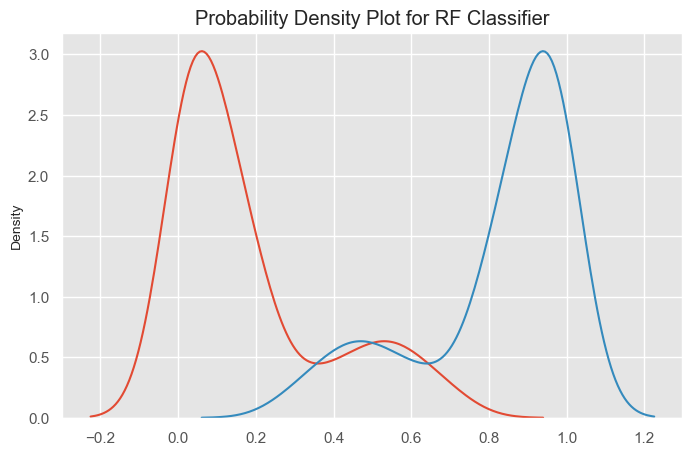

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = model_res.predict_proba(X_test)
plt.figure(figsize=(8,5))
sns.kdeplot(y_pred_prob[:,1],label="RF",common_norm=False)
sns.kdeplot(y_pred_prob[:,0],label="RF",common_norm=False)

plt.title("Probability Density Plot for RF Classifier")

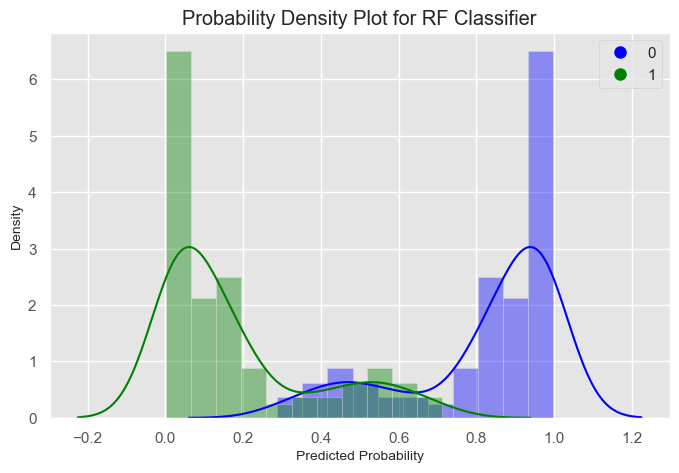

In [358]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5))
sns.distplot(y_pred_prob[:, 0], label="RF",color = 'blue')
sns.distplot(y_pred_prob[:, 1], label="RF",color = 'green')


# Custom legend entries for '0' and '1'
legend_entries = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='0'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=8, label='1')
]

plt.title("Probability Density Plot for RF Classifier")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
#plt.xlim(0, 1)  # Set x-axis limits to be between 0 and 1

# Add custom legend entries
plt.legend(handles=legend_entries)

plt.show()

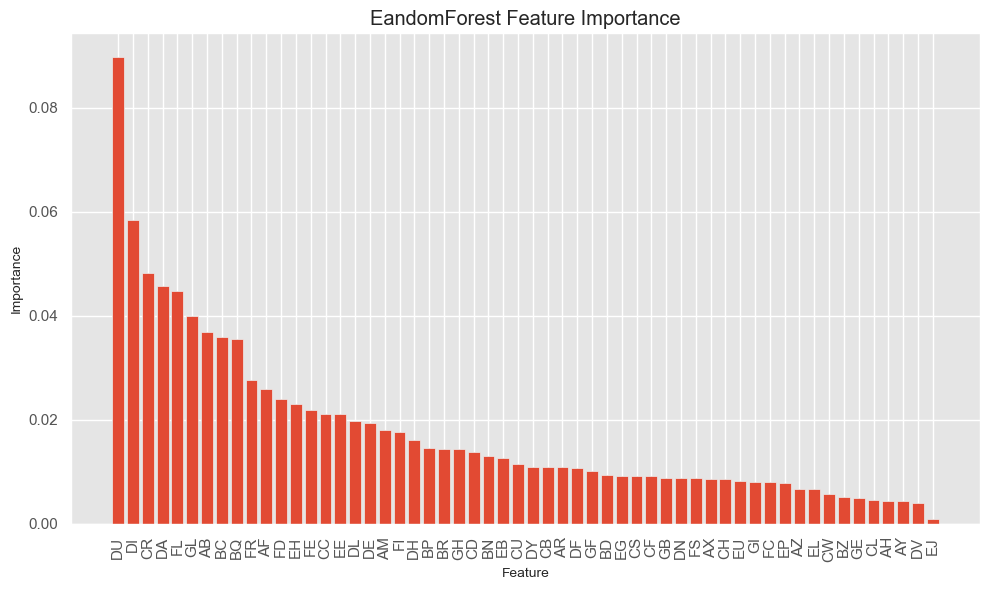

In [359]:
#Get feature importances
importances = model_rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('EandomForest Feature Importance')
plt.tight_layout()
plt.show()

# XGBOOST

In [360]:
# Create and train the XGBoost model
from xgboost import XGBClassifier
from sklearn import metrics
model_xgb = XGBClassifier(n_estimators=500, random_state=1, n_jobs=-1)
model_res = model_xgb.fit(X_train_oversampled, y_train_oversampled)

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# Create the custom scoring metric
scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# Evaluate model using cross-validation
scores = cross_val_score(model_res, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# Make predictions and evaluate the model on the test set
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Balanced logloss: ", abs(np.mean(scores)))
print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
print("test accuracy: ", model_res.score(X_test, y_test))
print('XGBoost: Accuracy=%.3f' % (ac))
print('XGBoost: f1-score=%.3f' % (f1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
auc = metrics.roc_auc_score(y_test, model_res.predict(X_test))
print("auc=%.3f" % auc)

Balanced logloss:  0.09287785127135154
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.910
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.76      0.73      0.74        22

    accuracy                           0.91       124
   macro avg       0.85      0.84      0.85       124
weighted avg       0.91      0.91      0.91       124

[[97  5]
 [ 6 16]]
auc=0.839


Text(0.5, 1.0, 'Probability Density Plot for XGB Classifier')

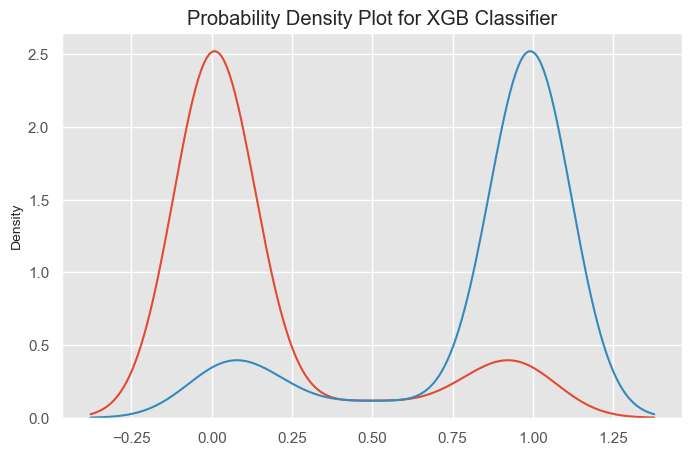

In [361]:
y_pred_prob = model_res.predict_proba(X_test)
plt.figure(figsize=(8,5))
sns.kdeplot(y_pred_prob[:,1],label="XGB",common_norm=False)
sns.kdeplot(y_pred_prob[:,0],label="XGB",common_norm=False)

plt.title("Probability Density Plot for XGB Classifier")

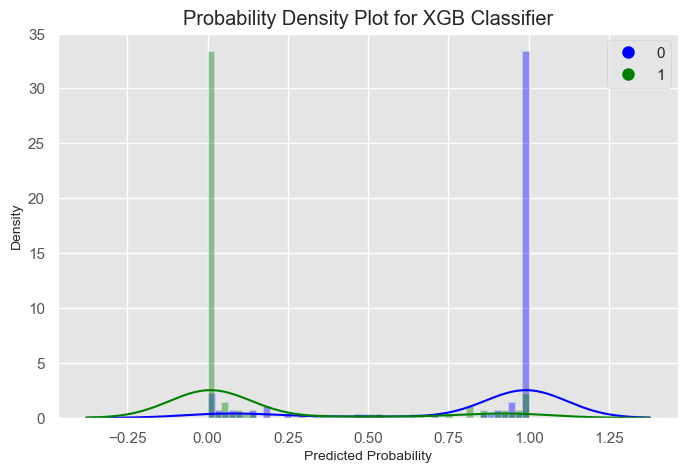

In [362]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5))
sns.distplot(y_pred_prob[:, 0], label="XGB",color = 'blue')
sns.distplot(y_pred_prob[:, 1], label="XGB",color = 'green')


# Custom legend entries for '0' and '1'
legend_entries = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='0'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=8, label='1')
]

plt.title("Probability Density Plot for XGB Classifier")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
#plt.xlim(0, 1)  # Set x-axis limits to be between 0 and 1

# Add custom legend entries
plt.legend(handles=legend_entries)

plt.show()

In [363]:
data_dict = {'True Label (y_test)': y_test, 'Predicted Probability (y_pred)': y_pred}

# Create a pandas DataFrame from the dictionary
df_comparison = pd.DataFrame(data_dict)

# Display the DataFrame
df_comparison

,True Label (y_test),Predicted Probability (y_pred)
Id,,
a20c68851e9b,0,0
3a73fce81608,0,0
55122c3c02a0,0,0
810ff5afd0e2,0,0
7c21c57859d6,0,0
...,...,...
c9e8391da0ea,0,0
c7f5064f4265,1,1
f003d68995be,0,0


In [364]:
df_comparison[df_comparison['True Label (y_test)'] != df_comparison['Predicted Probability (y_pred)']]

,True Label (y_test),Predicted Probability (y_pred)
Id,,
3924089e4396,1,0
49b8f248a42f,1,0
24b40510d6a2,1,0
ed3486389307,1,0
60474d8ff770,0,1
58dcdd9d6e89,0,1
8e5a0d625d98,0,1
8803ec4462c1,1,0
e2ef2a51ed65,0,1


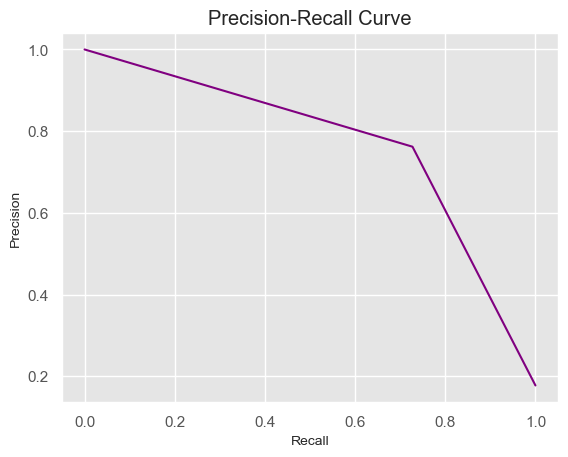

In [365]:
plot_precision_recall_curve(y_test, y_pred)

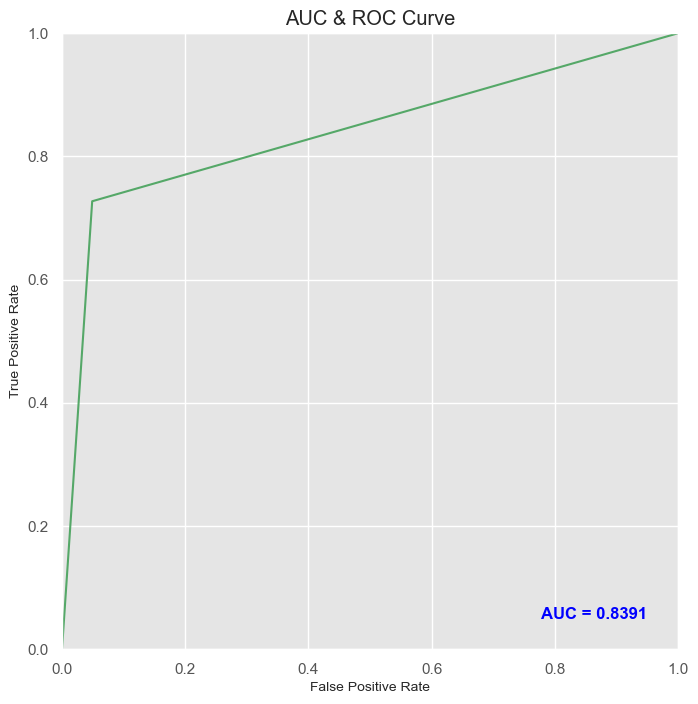

In [366]:
plot_roc_curve(y_test, y_pred)

In [ ]:
%%time
#Hyperparameter
ratio_of_neg_to_pos = len(y_train[y_train== 0]) / len(y_train[y_train == 1])


param_grid = {
    'learning_rate': [0.1, 0.05,0.01, 0.005,0.001],
    'n_estimators': [400,500,600,700,800],
    'max_depth': [3, 4, 5,6,7],
    'min_child_weight': [1, 5, 6,7,10],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [ratio_of_neg_to_pos],
    'alpha': [0, 0.1, 0.01, 0.001],
    'lambda': [0, 0.1, 0.01, 0.001]  
}
# Create an instance of XGBClassifier with early stopping
xgbc = XGBClassifier(random_state=42,objective='binary:logistic')


# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

scoring = {
           'Balanced_logloss': make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)
          }

#,
# Set up RandomizedSearchCV
xgbc_random = RandomizedSearchCV(
    xgbc, param_grid, cv=cv, return_train_score=True, scoring=scoring, n_iter=100, 
    verbose=2, random_state =1, n_jobs = -1,refit='Balanced_logloss'
)

# Define the evaluation set
#eval_set = [(X_train_oversampled, y_train_oversampled), (X_test, y_test)]

# Fit RandomizedSearchCV with custom evaluation function and eval_set
xgbc_random.fit(X_train_oversampled, y_train_oversampled, verbose=True)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", xgbc_random.best_params_)
print("Best Accuracy:", xgb_random.best_score_)

In [ ]:
print("Best Accuracy:", xgbc_random.best_score_)
print("Best Parameters:", xgbc_random.best_params_)

In [376]:
# Create and train the XGBoost model
from xgboost import XGBClassifier
ratio_of_neg_to_pos = len(y_train[y_train== 0]) / len(y_train[y_train == 1])

model_xgb_final = XGBClassifier(n_estimators=400, max_depth=6,learning_rate=0.05,min_child_weight=1,subsample=0.6,
                                random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
                                reg_lambda=0.1, gamma=0.3, colsample_bytree=0.6, reg_alpha=0.001)


model_res = model_xgb_final.fit(X_train_oversampled, y_train_oversampled)

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# Create the custom scoring metric
scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# Evaluate model using cross-validation
scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# Make predictions and evaluate the model on the test set
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
y_predict_proba = model_res.predict_proba(X_test)

# Print results
print("CV_Balanced logloss: ", abs(np.mean(scores)))
print("Actual_balanced_logloss: ",balanced_log_loss_manual(y_test, y_predict_proba[:,1]))
print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
print("test accuracy: ", model_res.score(X_test, y_test))
print('XGBoost: Accuracy=%.3f' % (ac))
print('XGBoost: f1-score=%.3f' % (f1))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
logloss = balanced_log_loss_manual(y_test, model_res.predict_proba(X_test)[:,1])

Precisionscore = precision_score(y_test, y_pred,average='weighted')
f1score = f1_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
#auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print("auc=%.3f" % auc)
print("Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
    F1score=%.3f, recall=%.3f, \
    auc=%.3f" % (accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


CV_Balanced logloss:  0.09397136780915945
Actual_balanced_logloss:  0.168996136784735
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.912
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.74      0.77      0.76        22

    accuracy                           0.91       124
   macro avg       0.84      0.86      0.85       124
weighted avg       0.91      0.91      0.91       124

[[96  6]
 [ 5 17]]
auc=0.857
Accuracy: 91.13%, logloss=0.169, precisionscore=0.913,     F1score=0.912, recall=0.911,     auc=0.857


In [383]:
#Reading new test data and apllying transfomations
test_df = pd.read_csv("test.csv")
test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})
tf = test_df.set_index("Id")
tf.columns = tf.columns.str.strip()
tf = scaler.transform(tf)
#transformed_tf = pd.DataFrame(tf, columns=test_df.columns.drop('Id'))

tf_preds = model_res.predict_proba(tf)
test_preds = pd.DataFrame(tf_preds,columns = ['Class_0','Class_1'])
test_preds

,Class_0,Class_1
0,0.967139,0.032861
1,0.967139,0.032861
2,0.967139,0.032861
3,0.967139,0.032861
4,0.967139,0.032861


In [384]:
test_preds.to_csv("submissions.csv")

Text(0.5, 1.0, 'Probability Density Plot for XGB Classifier')

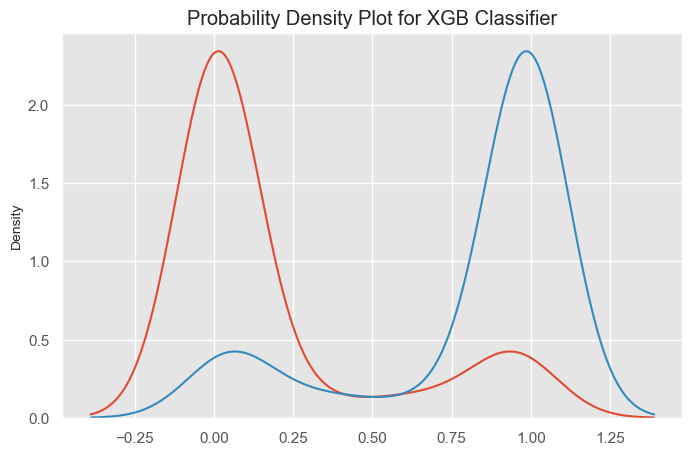

In [385]:
y_pred_prob = model_res.predict_proba(X_test)
plt.figure(figsize=(8,5))
sns.kdeplot(y_pred_prob[:,1],label="XGB",common_norm=False)
sns.kdeplot(y_pred_prob[:,0],label="XGB",common_norm=False)

plt.title("Probability Density Plot for XGB Classifier")

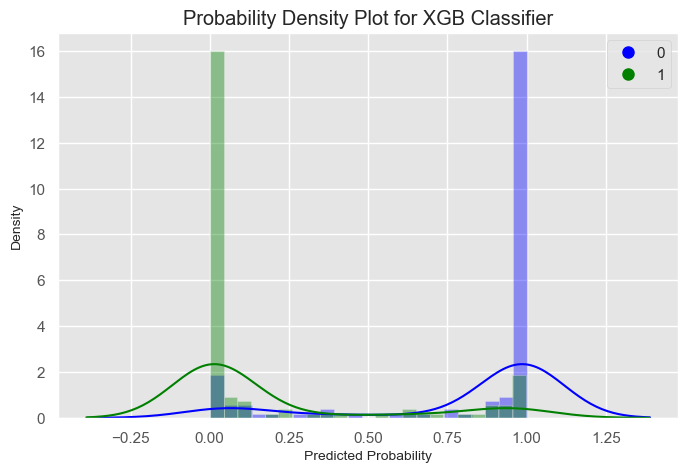

In [386]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5))
sns.distplot(y_pred_prob[:, 0], label="XGB",color = 'blue')
sns.distplot(y_pred_prob[:, 1], label="XGB",color = 'green')


# Custom legend entries for '0' and '1'
legend_entries = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='0'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=8, label='1')
]

plt.title("Probability Density Plot for XGB Classifier")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
#plt.xlim(0, 1)  # Set x-axis limits to be between 0 and 1

# Add custom legend entries
plt.legend(handles=legend_entries)

plt.show()

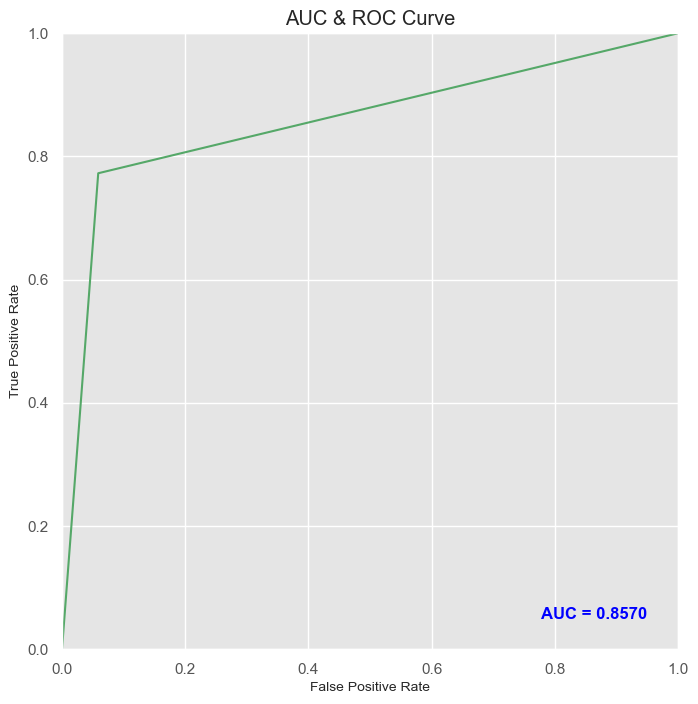

In [370]:
plot_roc_curve(y_test, y_pred)

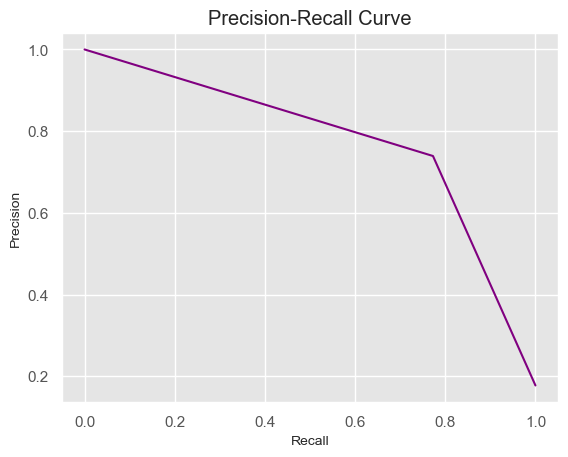

In [371]:
plot_precision_recall_curve(y_test, y_pred)

In [372]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(model_res.feature_importances_)
for thresh in thresholds:
    #select features using threshold
    selection = SelectFromModel(model_res, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_oversampled)
    # train model
    selection_model = XGBClassifier(n_estimators=400, max_depth=6,learning_rate=0.05,min_child_weight=1,subsample=0.6,
                                random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
                                reg_lambda=0.1, gamma=0.3, colsample_bytree=0.6, reg_alpha=0.001)

    selection_model.fit(select_X_train, y_train_oversampled)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    y_pred_proba = selection_model.predict_proba(select_X_test)
    #predictions = [round(value) for value in y_pred]
    #prediction = [value for value in y_pred1]
    accuracy = accuracy_score(y_test, y_pred)
    logloss = round(balanced_log_loss_manual(y_test, y_pred_proba[:,1]),3)
    Precisionscore = precision_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
    F1score=%.3f, recall=%.3f, \
    auc=%.3f" % (thresh, select_X_train.shape[1], accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


Thresh=0.002, n=56, Accuracy: 91.13%, logloss=0.169, precisionscore=0.913,     F1score=0.912, recall=0.911,     auc=0.857
Thresh=0.006, n=55, Accuracy: 89.52%, logloss=0.168, precisionscore=0.893,     F1score=0.894, recall=0.895,     auc=0.811
Thresh=0.006, n=54, Accuracy: 90.32%, logloss=0.160, precisionscore=0.903,     F1score=0.903, recall=0.903,     auc=0.834
Thresh=0.007, n=53, Accuracy: 91.94%, logloss=0.138, precisionscore=0.927,     F1score=0.922, recall=0.919,     auc=0.898
Thresh=0.007, n=52, Accuracy: 92.74%, logloss=0.169, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.008, n=51, Accuracy: 92.74%, logloss=0.164, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.008, n=50, Accuracy: 92.74%, logloss=0.166, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.008, n=49, Accuracy: 92.74%, logloss=0.176, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.009, n=48, Accu

In [373]:
feature_importances = model_res.feature_importances_
selected_feature_indices = feature_importances.argsort()[-53:][::-1]
sorted_importances = feature_importances[selected_feature_indices]
sorted_feature_names = feature_names[selected_feature_indices]
sorted_feature_names

Index(['AB', 'DU', 'FD', 'FE', 'CR', 'BQ', 'BN', 'CC', 'DI', 'DF', 'GH', 'EB',
       'DL', 'BC', 'CS', 'AF', 'FL', 'DA', 'DY', 'EH', 'EU', 'EL', 'CU', 'FR',
       'EE', 'BP', 'DH', 'AX', 'CD', 'DV', 'CB', 'EP', 'FC', 'BD', 'GI', 'DE',
       'CW', 'GF', 'BR', 'AM', 'GB', 'DN', 'CF', 'GE', 'FI', 'AR', 'GL', 'AH',
       'CH', 'AZ', 'CL', 'AY', 'EG'],
      dtype='object')

In [375]:
# Check data types
print("Data Type of X_new:", type(tf))
print("Data Type of X_train_oversampled:", type(X_train_oversampled))

# Check for feature scaling consistency
# If MinMaxScaler was used during preprocessing, adjust accordingly
# If StandardScaler was used, adjust accordingly
# ...

# Verify model compatibility
print("Model Type:", type(model_res))

# Print selected feature indices
print("Selected Feature Indices:", selected_feature_indices)
#print(sort(selected_feature_indices))

# Print shapes
print("Shape of X_new:", tf.shape)
print("Shape of X_train_oversampled:", X_train_oversampled.shape)

# Assuming X_new and X_train_oversampled are numpy arrays
if tf.shape[1] != X_train_oversampled.shape[1]:
    print("Number of features in X_new does not match X_train_oversampled.")
else:
    X_new_selected = tf.iloc[:, selected_feature_indices]

    # Now you can use the model to predict with the selected features
    y_new_pred = model_res.predict(X_new_selected)
    y_new_pred_prob = model_res.predict_proba(X_new_selected)

Data Type of X_new: <class 'numpy.ndarray'>
Data Type of X_train_oversampled: <class 'numpy.ndarray'>
Model Type: <class 'xgboost.sklearn.XGBClassifier'>
Selected Feature Indices: [ 0 32 44 45 21 12 10 16 29 27 53 35 30  8 22  1 47 25 34 38 42 40 23 48
 36 11 28  5 17 33 15 41 43  9 54 26 24 52 13  3 50 31 18 51 46  4 55  2
 19  7 20  6 37]
Shape of X_new: (5, 56)
Shape of X_train_oversampled: (814, 56)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'